In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D


from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import linalg

#import plotly.express as px
import urllib.request
import zipfile


from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler

import os
# os.environ["OMP_NUM_THREADS"] = "2"

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error
import geopandas as gpd

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from math import pi


from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Your Gaussian Mixture Model code here


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h1 style="font-size: 32px;">Selection of Factors based on Factor Scores</h1>

In [3]:
data_standardized = pd.read_csv('../../data/tidy/raw-data-standardized.csv') # modeshares (for commuting)
factors_df = pd.read_csv('../../data/tidy/raw-data-cleaned.csv')


factors_df

,msa,Node Count,Edge Count,Degree Average,Edge Length Total (km),Edge Length Average (km),Streets per Node Average,Intersection Count,Street Length Total (km),Street Segment Count,...,Transit Other Fuel Vehicle Miles,Transit Electric Propulsion Vehicle Miles,Transit Electric Battery Vehicle Miles,Cooling Degree Days (°Df),Heating Degree Days (°Df),Palmer Z Index,Average Temperature (°F),Precipitation (in),Population Density (/sq km),Built-Up Area Proportion
0,"Abilene, TX",14357.0,39401.0,5.488751,17168.965935,0.435749,2.881452,11912.0,8925.436120,20606.0,...,0.0,0.0,0.0,2383.00,2332.000000,0.340000,65.000000,27.356667,24.019917,5.944727
1,"Akron, OH",26865.0,70900.0,5.278243,15191.985931,0.214273,2.756896,21200.0,8039.294972,36980.0,...,0.0,0.0,0.0,823.00,5338.000000,0.165000,52.500000,40.550000,294.018910,38.222028
2,"Albany, GA",8466.0,22838.0,5.395228,9545.102272,0.417948,2.837468,6957.0,4989.592979,11954.0,...,0.0,0.0,0.0,2546.75,1526.000000,0.547500,67.725000,58.845000,35.333378,9.334387
3,"Albany-Lebanon, OR",7132.0,17906.0,5.021312,8280.294430,0.462431,2.568144,5101.0,4225.438910,9147.0,...,0.0,0.0,0.0,163.00,5550.000000,-0.350000,50.200000,65.670000,21.285743,3.662438
4,"Albany-Schenectady-Troy, NY",36977.0,96867.0,5.239311,27872.441864,0.287739,2.755794,30254.0,14555.424691,50900.0,...,0.0,0.0,0.0,529.40,6367.200000,-0.396000,48.860000,37.660000,118.206895,15.468786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,"Yakima, WA",10920.0,28902.0,5.293407,14155.026874,0.489759,2.709982,8275.0,7249.500452,14773.0,...,0.0,0.0,0.0,254.00,6455.000000,-0.860000,47.900000,22.810000,22.459825,20.914166
345,"York-Hanover, PA",16622.0,44476.0,5.351462,13291.255851,0.298841,2.781194,13507.0,6831.204674,23064.0,...,0.0,0.0,0.0,1050.00,4662.000000,-0.220000,55.000000,42.820000,189.847748,19.615869
346,"Youngstown-Warren-Boardman, OH-PA",24885.0,66650.0,5.356641,19738.540791,0.296152,2.794736,19982.0,10381.621775,34674.0,...,0.0,0.0,0.0,643.00,5695.333333,0.783333,51.033333,45.596667,119.182102,20.344176
347,"Yuba City, CA",8419.0,21665.0,5.146692,7925.868395,0.365837,2.678465,6360.0,4094.273240,11260.0,...,0.0,0.0,0.0,1969.50,2338.000000,-1.580000,63.950000,12.295000,53.631459,4.979487


In [4]:
# Define the number of factors to retain
n_factors = 8

# Perform Factor Analysis for each rotation and store factor scores
factor_scores = {}
rotations = ['varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort', 'promax', 'oblimin', 'quartimin', 'geomin_obl', None]

for rotation in rotations:
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation,method='ml')
    fa.fit(data_standardized)
    scores = fa.transform(data_standardized)
    factor_scores[rotation] = scores

# Choose the rotation method you prefer, here we use 'varimax' as an example
chosen_rotation = 'varimax'
scores = factor_scores[chosen_rotation]


# Standardize the factor scores if needed
# scaler_scores = StandardScaler()
# scores_standardized = scaler_scores.fit_transform(scores)
scaler = StandardScaler()
scores_standardized = scaler.fit_transform(scores)

# # Fit a Gaussian Mixture Model (GMM)
# n_components = 5  # Number of clusters to form
# gmm = GaussianMixture(n_components=n_components, random_state=42)
# gmm.fit(scores_standardized)
# cluster_labels = gmm.predict(scores_standardized)

# # Add the cluster labels to the original DataFrame
# factors_df['Cluster'] = cluster_labels

# # Visualize the clusters
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x=scores_standardized[:, 0], y=scores_standardized[:, 6], hue=cluster_labels, palette='viridis')
# plt.title('Clusters based on Factor Scores')
# plt.xlabel('Factor 1')
# plt.ylabel('Factor 2')
# plt.show()

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:443: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) - n_factors + corr_mtx.shape[0])
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:443: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) - n_factors + corr_mtx.shape[0])
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:443: Ru

In [5]:
scores_df = pd.DataFrame(scores, columns=[f'Factor {i+1}' for i in range(8)])
scores_df

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
0,-0.020769,-0.116631,-0.567720,-0.215719,1.024831,-0.196886,1.138187,1.305839
1,-0.595251,-0.032704,2.367134,0.181770,-0.714500,-0.538529,0.487787,-0.200201
2,-0.280811,0.056536,-0.590122,-0.044732,1.345877,-0.471593,0.828885,1.103606
3,-0.234983,0.067162,-1.131492,0.029690,-0.738241,-0.138377,-0.912521,0.868893
4,0.253770,-0.144994,0.279123,-0.278315,-1.043975,0.433586,0.400056,-0.411223
...,...,...,...,...,...,...,...,...
344,0.055568,-0.016343,-1.304796,-0.044245,-1.032406,-0.639057,0.115356,0.847270
345,-0.564581,0.064776,1.461622,0.149391,-0.349227,-0.563617,0.637335,0.441696
346,-0.082061,-0.059134,0.624753,-0.157510,-0.896252,-0.966299,0.642194,-0.369812
347,-0.398228,0.078186,-0.467446,-0.017681,0.861001,-0.215744,-0.064006,0.458856


<h1 style="font-size: 32px;">Criterion Selection of Cluster Number</h1>

In [6]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    return estimator.bic(X) 


param_grid = {
    "n_components": range(2, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(random_state=222), param_grid=param_grid, scoring=gmm_bic_score
)

grid_search.fit(scores) #Z_tsne

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df=df.sort_values(by="BIC score")#.head()
df_bic=df

In [7]:
def gmm_aic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the AIC score."""
    return estimator.aic(X)  # Use AIC instead of BIC

param_grid = {
    "n_components": range(2, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

# Use the AIC scoring function
grid_search = GridSearchCV(
    GaussianMixture(random_state=222), param_grid=param_grid, scoring=gmm_aic_score
)

# Fit the model
grid_search.fit(scores)  # Replace 'scores' with your dataset variable

# Extract the results into a DataFrame
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]

# Rename columns and process the DataFrame
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "AIC score",
    }
)

# Sort by AIC score
df=df.sort_values(by="AIC score")  # Add `.head()` to see the top results if needed
df_aic=df

In [8]:
# Define the parameter grid
param_grid = {
    "n_components": range(2, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

# Create the GridSearchCV object without specifying scoring
grid_search = GridSearchCV(
    GaussianMixture(random_state=222),
    param_grid=param_grid,
    cv=5  # 3-fold cross-validation
)

# Fit the GridSearchCV object to the data
grid_search.fit(scores)  # Ensure 'scores' is a valid dataset (array-like)

# Extract and format the results
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "Mean Log-likelihood per sample",
    }
)

# Calculate the total log-likelihood if required
n_samples = scores.shape[0]
df["Total Log-likelihood"] = df["Mean Log-likelihood per sample"] * n_samples

# Sort results by total log-likelihood (higher is better)
df = df.sort_values(by="Mean Log-likelihood per sample", ascending=False)

df_ll=df

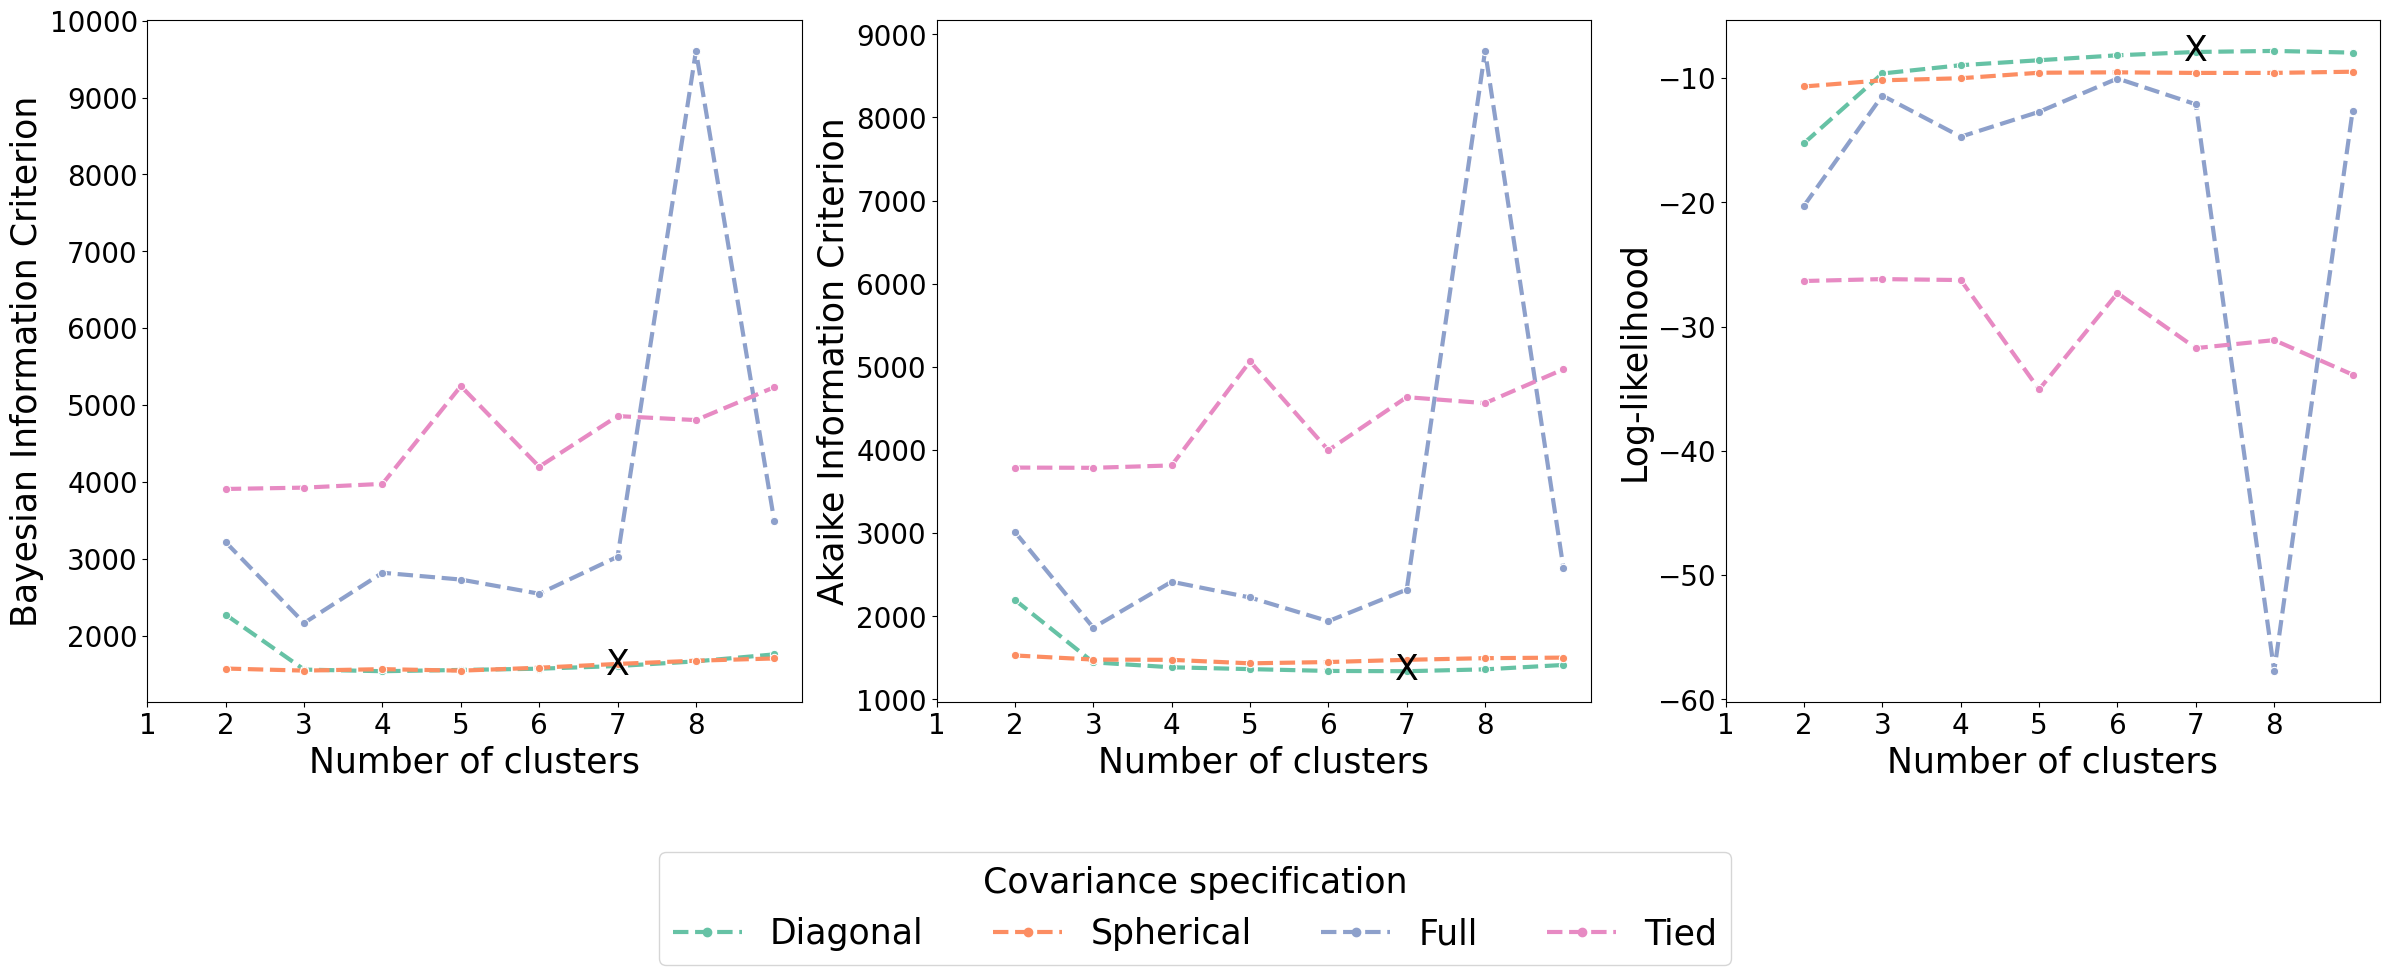

In [9]:
gmm_grid_bic = df_bic.copy()
gmm_grid_bic['Type of covariance'] = gmm_grid_bic['Type of covariance'].map({"spherical":"Spherical", "tied":"Tied", "diag":"Diagonal", "full":"Full"})


gmm_grid_aic = df_aic.copy()
gmm_grid_aic['Type of covariance'] = gmm_grid_aic['Type of covariance'].map({"spherical":"Spherical", "tied":"Tied", "diag":"Diagonal", "full":"Full"})



gmm_grid_ll = df_ll.copy()
gmm_grid_ll['Type of covariance'] = gmm_grid_ll['Type of covariance'].map({"spherical":"Spherical", "tied":"Tied", "diag":"Diagonal", "full":"Full"})



# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Adjusted figure size for 3 plots

# First plot: BIC score
sns.lineplot(data=gmm_grid_bic, x='Number of components', y='BIC score', hue='Type of covariance',
             palette='Set2', marker='o', linewidth=3, linestyle='--', ax=axes[0], legend=False)
axes[0].set_xlabel("Number of clusters", fontsize=25)
axes[0].set_ylabel("Bayesian Information Criterion", fontsize=25)
axes[0].tick_params(axis='both', labelsize=20)
axes[0].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 10

# Check if Number of components is 7 and Type of covariance is 'diag' for BIC plot
bic_min_point = gmm_grid_bic[(gmm_grid_bic['Number of components'] == 7) & (gmm_grid_bic['Type of covariance'] == 'Diagonal')]
if not bic_min_point.empty:
    x = bic_min_point['Number of components'].values[0]
    y = bic_min_point['BIC score'].values[0]
    axes[0].annotate(' X', (x, y), fontsize=25, color='black', 
                     verticalalignment='center', horizontalalignment='center', 
                     textcoords="offset points", xytext=(-4, 1))  # Adjusting position slightly

# Second plot: AIC score
sns.lineplot(data=gmm_grid_aic, x='Number of components', y='AIC score', hue='Type of covariance',
             palette='Set2', marker='o', linewidth=3, linestyle='--', ax=axes[1], legend=False)
axes[1].set_xlabel("Number of clusters", fontsize=25)
axes[1].set_ylabel("Akaike Information Criterion", fontsize=25)
axes[1].tick_params(axis='both', labelsize=20)
axes[1].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 10

# Check if Number of components is 7 and Type of covariance is 'diag' for AIC plot
aic_min_point = gmm_grid_aic[(gmm_grid_aic['Number of components'] == 7) & (gmm_grid_aic['Type of covariance'] == 'Diagonal')]
if not aic_min_point.empty:
    x = aic_min_point['Number of components'].values[0]
    y = aic_min_point['AIC score'].values[0]
    axes[1].annotate(' X', (x, y), fontsize=25, color='black', 
                     verticalalignment='center', horizontalalignment='center', 
                     textcoords="offset points", xytext=(-4, 1))  # Adjusting position slightly

# Third plot: Log-likelihood
sns.lineplot(data=gmm_grid_ll, x='Number of components', y='Mean Log-likelihood per sample', hue='Type of covariance',
             palette='Set2', marker='o', linewidth=3, linestyle='--', ax=axes[2], legend=False)
axes[2].set_xlabel("Number of clusters", fontsize=25)
axes[2].set_ylabel("Log-likelihood", fontsize=25)
axes[2].tick_params(axis='both', labelsize=20)
axes[2].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 10

# Check if Number of components is 7 and Type of covariance is 'diag' for Log-likelihood plot
ll_max_point = gmm_grid_ll[(gmm_grid_ll['Number of components'] == 7) & (gmm_grid_ll['Type of covariance'] == 'Diagonal')]
if not ll_max_point.empty:
    x = ll_max_point['Number of components'].values[0]
    y = ll_max_point['Mean Log-likelihood per sample'].values[0]
    axes[2].annotate(' X', (x, y), fontsize=25, color='black', 
                     verticalalignment='center', horizontalalignment='center', 
                     textcoords="offset points", xytext=(-4, 1))  # Adjusting position slightly

# Manually create the legend (using Line2D for markers)
# Define the handles (lines) and labels for the legend
handles = [
    Line2D([0], [0], color=sns.color_palette('Set2')[0], lw=3, linestyle='--', marker='o'),  # Type 1
    Line2D([0], [0], color=sns.color_palette('Set2')[1], lw=3, linestyle='--', marker='o'),  # Type 2
    Line2D([0], [0], color=sns.color_palette('Set2')[2], lw=3, linestyle='--', marker='o'),  # Type 3
    Line2D([0], [0], color=sns.color_palette('Set2')[3], lw=3, linestyle='--', marker='o')   # Type 4
]
labels = ['Diagonal', 'Spherical', 'Full', 'Tied']  # Modify according to your actual labels for the types

# Add the legend to the figure at the bottom
fig.legend(handles, labels, title='Covariance specification', fontsize=25, title_fontsize=25, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Adjust layout to avoid overlap and ensure the legend is visible
plt.subplots_adjust(bottom=0.2)  # Adjust bottom spacing to make room for the legend
plt.tight_layout()

# Save the figure with the legend
plt.savefig('../../figures/combined_plots_criterion.jpg', dpi=1200, bbox_inches='tight')
# plt.show()


<h1 style="font-size: 32px;">Gaussian Clustering Model</h1>

In [10]:
gmm = GaussianMixture(random_state=222, n_components=7,covariance_type="diag")
gmm.fit(scores)

GaussianMixture(covariance_type='diag', n_components=7, random_state=222)

In [11]:

# Predict the labels
YY = gmm.predict(scores)


true_labels = np.random.randint(0, 8, size=scores.shape[0])

# Calculate Silhouette Score
silhouette = silhouette_score(scores, YY)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scores, YY)

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(true_labels, YY)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(scores, YY)

# Display the results
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")


Silhouette Score: 0.0217
Davies-Bouldin Index: 1.8588
Adjusted Rand Index: -0.0020
Calinski-Harabasz Index: 37.6226


In [12]:
YY = gmm.predict(scores)

pcdf = pd.DataFrame(scores, columns = ['Auto + Scale',
    'Transit Propensity',
    'Density',
    'Sustainable Transit',
    'Warm Weather',
    'Remote + Active',
    'Network Connectivity',
    'Network Sprawl'])


new_column = factors_df['msa']
pcdf.insert(0, 'msa', new_column)

pcdf['Cluster'] =YY+1

pcdf.to_csv('../../data/tidy/factors-factoranalysis.csv', index=False)
pcdf

,msa,Auto + Scale,Transit Propensity,Density,Sustainable Transit,Warm Weather,Remote + Active,Network Connectivity,Network Sprawl,Cluster
0,"Abilene, TX",-0.020769,-0.116631,-0.567720,-0.215719,1.024831,-0.196886,1.138187,1.305839,3
1,"Akron, OH",-0.595251,-0.032704,2.367134,0.181770,-0.714500,-0.538529,0.487787,-0.200201,7
2,"Albany, GA",-0.280811,0.056536,-0.590122,-0.044732,1.345877,-0.471593,0.828885,1.103606,3
3,"Albany-Lebanon, OR",-0.234983,0.067162,-1.131492,0.029690,-0.738241,-0.138377,-0.912521,0.868893,1
4,"Albany-Schenectady-Troy, NY",0.253770,-0.144994,0.279123,-0.278315,-1.043975,0.433586,0.400056,-0.411223,3
...,...,...,...,...,...,...,...,...,...,...
344,"Yakima, WA",0.055568,-0.016343,-1.304796,-0.044245,-1.032406,-0.639057,0.115356,0.847270,3
345,"York-Hanover, PA",-0.564581,0.064776,1.461622,0.149391,-0.349227,-0.563617,0.637335,0.441696,5
346,"Youngstown-Warren-Boardman, OH-PA",-0.082061,-0.059134,0.624753,-0.157510,-0.896252,-0.966299,0.642194,-0.369812,3
347,"Yuba City, CA",-0.398228,0.078186,-0.467446,-0.017681,0.861001,-0.215744,-0.064006,0.458856,5


In [13]:
factors_df['Cluster'] =YY+1
factors_df.to_csv('../../data/tidy/raw-data-cluster.csv', index=False)

factors_df

,msa,Node Count,Edge Count,Degree Average,Edge Length Total (km),Edge Length Average (km),Streets per Node Average,Intersection Count,Street Length Total (km),Street Segment Count,...,Transit Electric Propulsion Vehicle Miles,Transit Electric Battery Vehicle Miles,Cooling Degree Days (°Df),Heating Degree Days (°Df),Palmer Z Index,Average Temperature (°F),Precipitation (in),Population Density (/sq km),Built-Up Area Proportion,Cluster
0,"Abilene, TX",14357.0,39401.0,5.488751,17168.965935,0.435749,2.881452,11912.0,8925.436120,20606.0,...,0.0,0.0,2383.00,2332.000000,0.340000,65.000000,27.356667,24.019917,5.944727,3
1,"Akron, OH",26865.0,70900.0,5.278243,15191.985931,0.214273,2.756896,21200.0,8039.294972,36980.0,...,0.0,0.0,823.00,5338.000000,0.165000,52.500000,40.550000,294.018910,38.222028,7
2,"Albany, GA",8466.0,22838.0,5.395228,9545.102272,0.417948,2.837468,6957.0,4989.592979,11954.0,...,0.0,0.0,2546.75,1526.000000,0.547500,67.725000,58.845000,35.333378,9.334387,3
3,"Albany-Lebanon, OR",7132.0,17906.0,5.021312,8280.294430,0.462431,2.568144,5101.0,4225.438910,9147.0,...,0.0,0.0,163.00,5550.000000,-0.350000,50.200000,65.670000,21.285743,3.662438,1
4,"Albany-Schenectady-Troy, NY",36977.0,96867.0,5.239311,27872.441864,0.287739,2.755794,30254.0,14555.424691,50900.0,...,0.0,0.0,529.40,6367.200000,-0.396000,48.860000,37.660000,118.206895,15.468786,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,"Yakima, WA",10920.0,28902.0,5.293407,14155.026874,0.489759,2.709982,8275.0,7249.500452,14773.0,...,0.0,0.0,254.00,6455.000000,-0.860000,47.900000,22.810000,22.459825,20.914166,3
345,"York-Hanover, PA",16622.0,44476.0,5.351462,13291.255851,0.298841,2.781194,13507.0,6831.204674,23064.0,...,0.0,0.0,1050.00,4662.000000,-0.220000,55.000000,42.820000,189.847748,19.615869,5
346,"Youngstown-Warren-Boardman, OH-PA",24885.0,66650.0,5.356641,19738.540791,0.296152,2.794736,19982.0,10381.621775,34674.0,...,0.0,0.0,643.00,5695.333333,0.783333,51.033333,45.596667,119.182102,20.344176,3
347,"Yuba City, CA",8419.0,21665.0,5.146692,7925.868395,0.365837,2.678465,6360.0,4094.273240,11260.0,...,0.0,0.0,1969.50,2338.000000,-1.580000,63.950000,12.295000,53.631459,4.979487,5


In [14]:
pcdf_melt = pd.melt(pcdf.iloc[:, 1:], id_vars='Cluster', value_name='Factor Score',var_name='factors')

In [15]:
#mapping and visualization
# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../data/raw/cb_2018_us_cbsa_500k/cb_2018_us_cbsa_500k.shp')
us_state = gpd.read_file('../../data/raw/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
# Filter for Metropolitan Statistical Areas (MSA)
msa_gdf = gdf[(gdf['CBSAFP'].notnull()) & (gdf['LSAD'] == 'M1')]

# Extract city and state from NAME in df2
msa_gdf[['Area', 'State']] = msa_gdf['NAME'].str.split(', ', expand=True)
msa_gdf['Area'] = msa_gdf['Area'].str.split('-').str[0]
msa_gdf

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Area,State
0,None,31340,310M400US31340,31340,"Lynchburg, VA",M1,5491925729,68559452,"POLYGON ((-79.85840 37.26715, -79.85660 37.268...",Lynchburg,VA
1,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7...",Santa Rosa,CA
3,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684...",Tulsa,OK
5,None,41740,310M400US41740,41740,"San Diego-Carlsbad, CA",M1,10900649391,820695499,"POLYGON ((-117.59615 33.38717, -117.59360 33.3...",San Diego,CA
8,340,38220,310M400US38220,38220,"Pine Bluff, AR",M1,5255934204,143446207,"POLYGON ((-92.47391 34.00623, -92.47241 34.038...",Pine Bluff,AR
...,...,...,...,...,...,...,...,...,...,...,...
934,None,42020,310M400US42020,42020,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",M1,8548611925,815519172,"POLYGON ((-121.34636 35.79518, -121.24378 35.7...",San Luis Obispo,CA
936,None,49740,310M400US49740,49740,"Yuma, AZ",M1,14281127830,13326079,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",Yuma,AZ
938,222,20020,310M400US20020,20020,"Dothan, AL",M1,4444678880,33248036,"POLYGON ((-86.19348 31.19221, -86.14167 31.192...",Dothan,AL
939,408,14860,310M400US14860,14860,"Bridgeport-Stamford-Norwalk, CT",M1,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",Bridgeport,CT


In [16]:
factors_df['Cluster'] = YY+1
factors_df

,msa,Node Count,Edge Count,Degree Average,Edge Length Total (km),Edge Length Average (km),Streets per Node Average,Intersection Count,Street Length Total (km),Street Segment Count,...,Transit Electric Propulsion Vehicle Miles,Transit Electric Battery Vehicle Miles,Cooling Degree Days (°Df),Heating Degree Days (°Df),Palmer Z Index,Average Temperature (°F),Precipitation (in),Population Density (/sq km),Built-Up Area Proportion,Cluster
0,"Abilene, TX",14357.0,39401.0,5.488751,17168.965935,0.435749,2.881452,11912.0,8925.436120,20606.0,...,0.0,0.0,2383.00,2332.000000,0.340000,65.000000,27.356667,24.019917,5.944727,3
1,"Akron, OH",26865.0,70900.0,5.278243,15191.985931,0.214273,2.756896,21200.0,8039.294972,36980.0,...,0.0,0.0,823.00,5338.000000,0.165000,52.500000,40.550000,294.018910,38.222028,7
2,"Albany, GA",8466.0,22838.0,5.395228,9545.102272,0.417948,2.837468,6957.0,4989.592979,11954.0,...,0.0,0.0,2546.75,1526.000000,0.547500,67.725000,58.845000,35.333378,9.334387,3
3,"Albany-Lebanon, OR",7132.0,17906.0,5.021312,8280.294430,0.462431,2.568144,5101.0,4225.438910,9147.0,...,0.0,0.0,163.00,5550.000000,-0.350000,50.200000,65.670000,21.285743,3.662438,1
4,"Albany-Schenectady-Troy, NY",36977.0,96867.0,5.239311,27872.441864,0.287739,2.755794,30254.0,14555.424691,50900.0,...,0.0,0.0,529.40,6367.200000,-0.396000,48.860000,37.660000,118.206895,15.468786,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,"Yakima, WA",10920.0,28902.0,5.293407,14155.026874,0.489759,2.709982,8275.0,7249.500452,14773.0,...,0.0,0.0,254.00,6455.000000,-0.860000,47.900000,22.810000,22.459825,20.914166,3
345,"York-Hanover, PA",16622.0,44476.0,5.351462,13291.255851,0.298841,2.781194,13507.0,6831.204674,23064.0,...,0.0,0.0,1050.00,4662.000000,-0.220000,55.000000,42.820000,189.847748,19.615869,5
346,"Youngstown-Warren-Boardman, OH-PA",24885.0,66650.0,5.356641,19738.540791,0.296152,2.794736,19982.0,10381.621775,34674.0,...,0.0,0.0,643.00,5695.333333,0.783333,51.033333,45.596667,119.182102,20.344176,3
347,"Yuba City, CA",8419.0,21665.0,5.146692,7925.868395,0.365837,2.678465,6360.0,4094.273240,11260.0,...,0.0,0.0,1969.50,2338.000000,-1.580000,63.950000,12.295000,53.631459,4.979487,5


In [17]:
# Assuming your DataFrame is named 'df'
cluster_1_df = factors_df[factors_df['Cluster'] == 1]
msa_names_1 = cluster_1_df['msa'].tolist()

cluster_2_df = factors_df[factors_df['Cluster'] == 2]
msa_names_2 = cluster_2_df['msa'].tolist()

cluster_3_df = factors_df[factors_df['Cluster'] == 3]
msa_names_3 = cluster_3_df['msa'].tolist()

cluster_4_df = factors_df[factors_df['Cluster'] == 4]
msa_names_4 = cluster_4_df['msa'].tolist()

cluster_5_df = factors_df[factors_df['Cluster'] == 5]
msa_names_5 = cluster_5_df['msa'].tolist()

cluster_6_df = factors_df[factors_df['Cluster'] == 6]
msa_names_6 = cluster_6_df['msa'].tolist()

cluster_7_df = factors_df[factors_df['Cluster'] == 7]
msa_names_7 = cluster_7_df['msa'].tolist()

# cluster_8_df = factors_df[factors_df['Cluster'] == 8]
# msa_names_8 = cluster_8_df['msa'].tolist()

# cluster_9_df = factors_df[factors_df['Cluster'] == 9]
# msa_names_9 = cluster_9_df['msa'].tolist()


In [18]:
len1=len(msa_names_1)
len2=len(msa_names_2)
len3=len(msa_names_3)
len4=len(msa_names_4)
len5=len(msa_names_5)
len6=len(msa_names_6)
len7=len(msa_names_7)
# len8=len(msa_names_8)

In [19]:
print(len1,len2,len3,len4,len5,len6,len7)
#active sparse, transit dense, auto sparse, auto large,  
#auto small, eco-transit sprawl, active dense.



58 1 128 63 86 1 12


In [20]:
factors_df[['Area', 'State']] = factors_df['msa'].str.split(', ', expand=True)
factors_df['Area'] = factors_df['Area'].str.split('-').str[0]

if isinstance(factors_df.columns, pd.MultiIndex):
    factors_df.columns = factors_df.columns.get_level_values(0)
if isinstance(msa_gdf.columns, pd.MultiIndex):
    msa_gdf.columns = msa_gdf.columns.get_level_values(0)

# Merge the dataframes on the 'Area' and 'State' columns
merged_df = msa_gdf.merge(factors_df, on=['Area', 'State'], suffixes=('_pivot', '_msa'))


merged_df['Cluster'] = pd.Categorical(merged_df['Cluster'])
merged_df

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Area,...,Transit Electric Propulsion Vehicle Miles,Transit Electric Battery Vehicle Miles,Cooling Degree Days (°Df),Heating Degree Days (°Df),Palmer Z Index,Average Temperature (°F),Precipitation (in),Population Density (/sq km),Built-Up Area Proportion,Cluster
0,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7...",Santa Rosa,...,0.0,12132.0,588.000000,2628.0,-1.650000,59.400000,14.860000,107.927032,4.169099,1
1,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684...",Tulsa,...,0.0,0.0,1773.142857,3318.0,0.537143,60.685714,44.172857,59.445591,54.251992,4
2,None,41740,310M400US41740,41740,"San Diego-Carlsbad, CA",M1,10900649391,820695499,"POLYGON ((-117.59615 33.38717, -117.59360 33.3...",San Diego,...,9579691.0,0.0,1752.000000,1846.0,-0.040000,64.700000,11.350000,284.079508,4.483115,4
3,340,38220,310M400US38220,38220,"Pine Bluff, AR",M1,5255934204,143446207,"POLYGON ((-92.47391 34.00623, -92.47241 34.038...",Pine Bluff,...,0.0,0.0,1856.666667,2630.0,1.553333,62.800000,71.176667,16.551271,40.013818,3
4,None,17020,310M400US17020,17020,"Chico, CA",M1,4238438186,105311003,"POLYGON ((-122.06874 39.84222, -122.06694 39.8...",Chico,...,0.0,0.0,1730.000000,2680.0,-1.080000,62.400000,19.160000,51.446662,6.847072,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,None,42020,310M400US42020,42020,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",M1,8548611925,815519172,"POLYGON ((-121.34636 35.79518, -121.24378 35.7...",San Luis Obispo,...,0.0,0.0,1078.000000,2470.0,-1.020000,61.100000,9.310000,30.150022,30.018735,1
342,None,49740,310M400US49740,49740,"Yuma, AZ",M1,14281127830,13326079,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",Yuma,...,0.0,0.0,4526.000000,1146.0,-0.700000,74.200000,3.530000,14.768093,22.206178,3
343,222,20020,310M400US20020,20020,"Dothan, AL",M1,4444678880,33248036,"POLYGON ((-86.19348 31.19221, -86.14167 31.192...",Dothan,...,0.0,0.0,2604.000000,1484.0,0.886667,68.000000,68.603333,33.224172,9.442990,3
344,408,14860,310M400US14860,14860,"Bridgeport-Stamford-Norwalk, CT",M1,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",Bridgeport,...,0.0,0.0,866.000000,5106.0,-0.740000,53.300000,43.400000,506.574925,46.966302,7


In [21]:

scores_df['Cluster'] = YY+1

In [22]:
pcdf['Cluster'] = YY+1
pcdf.to_csv('../../data/tidy/factors-factoranalysis.csv', index=False)

In [23]:
pcdf

,msa,Auto + Scale,Transit Propensity,Density,Sustainable Transit,Warm Weather,Remote + Active,Network Connectivity,Network Sprawl,Cluster
0,"Abilene, TX",-0.020769,-0.116631,-0.567720,-0.215719,1.024831,-0.196886,1.138187,1.305839,3
1,"Akron, OH",-0.595251,-0.032704,2.367134,0.181770,-0.714500,-0.538529,0.487787,-0.200201,7
2,"Albany, GA",-0.280811,0.056536,-0.590122,-0.044732,1.345877,-0.471593,0.828885,1.103606,3
3,"Albany-Lebanon, OR",-0.234983,0.067162,-1.131492,0.029690,-0.738241,-0.138377,-0.912521,0.868893,1
4,"Albany-Schenectady-Troy, NY",0.253770,-0.144994,0.279123,-0.278315,-1.043975,0.433586,0.400056,-0.411223,3
...,...,...,...,...,...,...,...,...,...,...
344,"Yakima, WA",0.055568,-0.016343,-1.304796,-0.044245,-1.032406,-0.639057,0.115356,0.847270,3
345,"York-Hanover, PA",-0.564581,0.064776,1.461622,0.149391,-0.349227,-0.563617,0.637335,0.441696,5
346,"Youngstown-Warren-Boardman, OH-PA",-0.082061,-0.059134,0.624753,-0.157510,-0.896252,-0.966299,0.642194,-0.369812,3
347,"Yuba City, CA",-0.398228,0.078186,-0.467446,-0.017681,0.861001,-0.215744,-0.064006,0.458856,5


In [24]:
scores_df

# Define new column names
factor_names = [
    'Auto + Scale',
    'Transit Propensity',
    'Density',
    'Sustainable Transit',
    'Warm Weather',
    'Remote + Active',
    'Network Connectivity',
    'Network Sprawl'
]



# Update the column names of the DataFrame
scores_df.columns = factor_names + ['Cluster']

scores_df

,Auto + Scale,Transit Propensity,Density,Sustainable Transit,Warm Weather,Remote + Active,Network Connectivity,Network Sprawl,Cluster
0,-0.020769,-0.116631,-0.567720,-0.215719,1.024831,-0.196886,1.138187,1.305839,3
1,-0.595251,-0.032704,2.367134,0.181770,-0.714500,-0.538529,0.487787,-0.200201,7
2,-0.280811,0.056536,-0.590122,-0.044732,1.345877,-0.471593,0.828885,1.103606,3
3,-0.234983,0.067162,-1.131492,0.029690,-0.738241,-0.138377,-0.912521,0.868893,1
4,0.253770,-0.144994,0.279123,-0.278315,-1.043975,0.433586,0.400056,-0.411223,3
...,...,...,...,...,...,...,...,...,...
344,0.055568,-0.016343,-1.304796,-0.044245,-1.032406,-0.639057,0.115356,0.847270,3
345,-0.564581,0.064776,1.461622,0.149391,-0.349227,-0.563617,0.637335,0.441696,5
346,-0.082061,-0.059134,0.624753,-0.157510,-0.896252,-0.966299,0.642194,-0.369812,3
347,-0.398228,0.078186,-0.467446,-0.017681,0.861001,-0.215744,-0.064006,0.458856,5


Cluster 1: Shows significant variability in Factor 1, suggesting that Factor 1 contributes significantly to this cluster.
Cluster 2: The absence of factor scores indicates an issue with the data for this cluster.
Cluster 3: Shows moderate variability in multiple factors, suggesting that these factors contribute to this cluster.
Cluster 4: Displays variability across different factors, indicating a mix of contributions from multiple factors.
Cluster 5: Similar to Cluster 4, showing a mix of contributions from multiple factors.

In [25]:
cluster_means = scores_df.groupby('Cluster').mean()
cluster_medians = scores_df.groupby('Cluster').median()
cluster_stds = scores_df.groupby('Cluster').std()
cluster_medians

,Auto + Scale,Transit Propensity,Density,Sustainable Transit,Warm Weather,Remote + Active,Network Connectivity,Network Sprawl
Cluster,,,,,,,,
1,-0.324298,0.016555,-1.072472,0.002762,-0.700580,0.688579,-0.212753,-0.019751
2,3.166843,17.749787,-0.174410,-0.842010,0.182863,-1.312906,-0.058955,-0.136911
3,-0.132951,-0.058241,-0.316901,-0.129995,0.360632,-0.288299,0.095386,0.203911
4,0.890132,-0.354862,0.283318,-0.291101,-0.040362,-0.086222,-0.217608,-0.221732
5,-0.591031,0.096614,0.298255,0.027026,-0.445324,-0.534368,-0.039669,-0.244296
6,1.241218,0.705324,0.478495,17.527701,0.036445,-0.575324,0.233671,1.038230
7,-0.874497,-0.013252,2.099351,-0.018843,-0.441340,0.620631,0.590879,0.227828


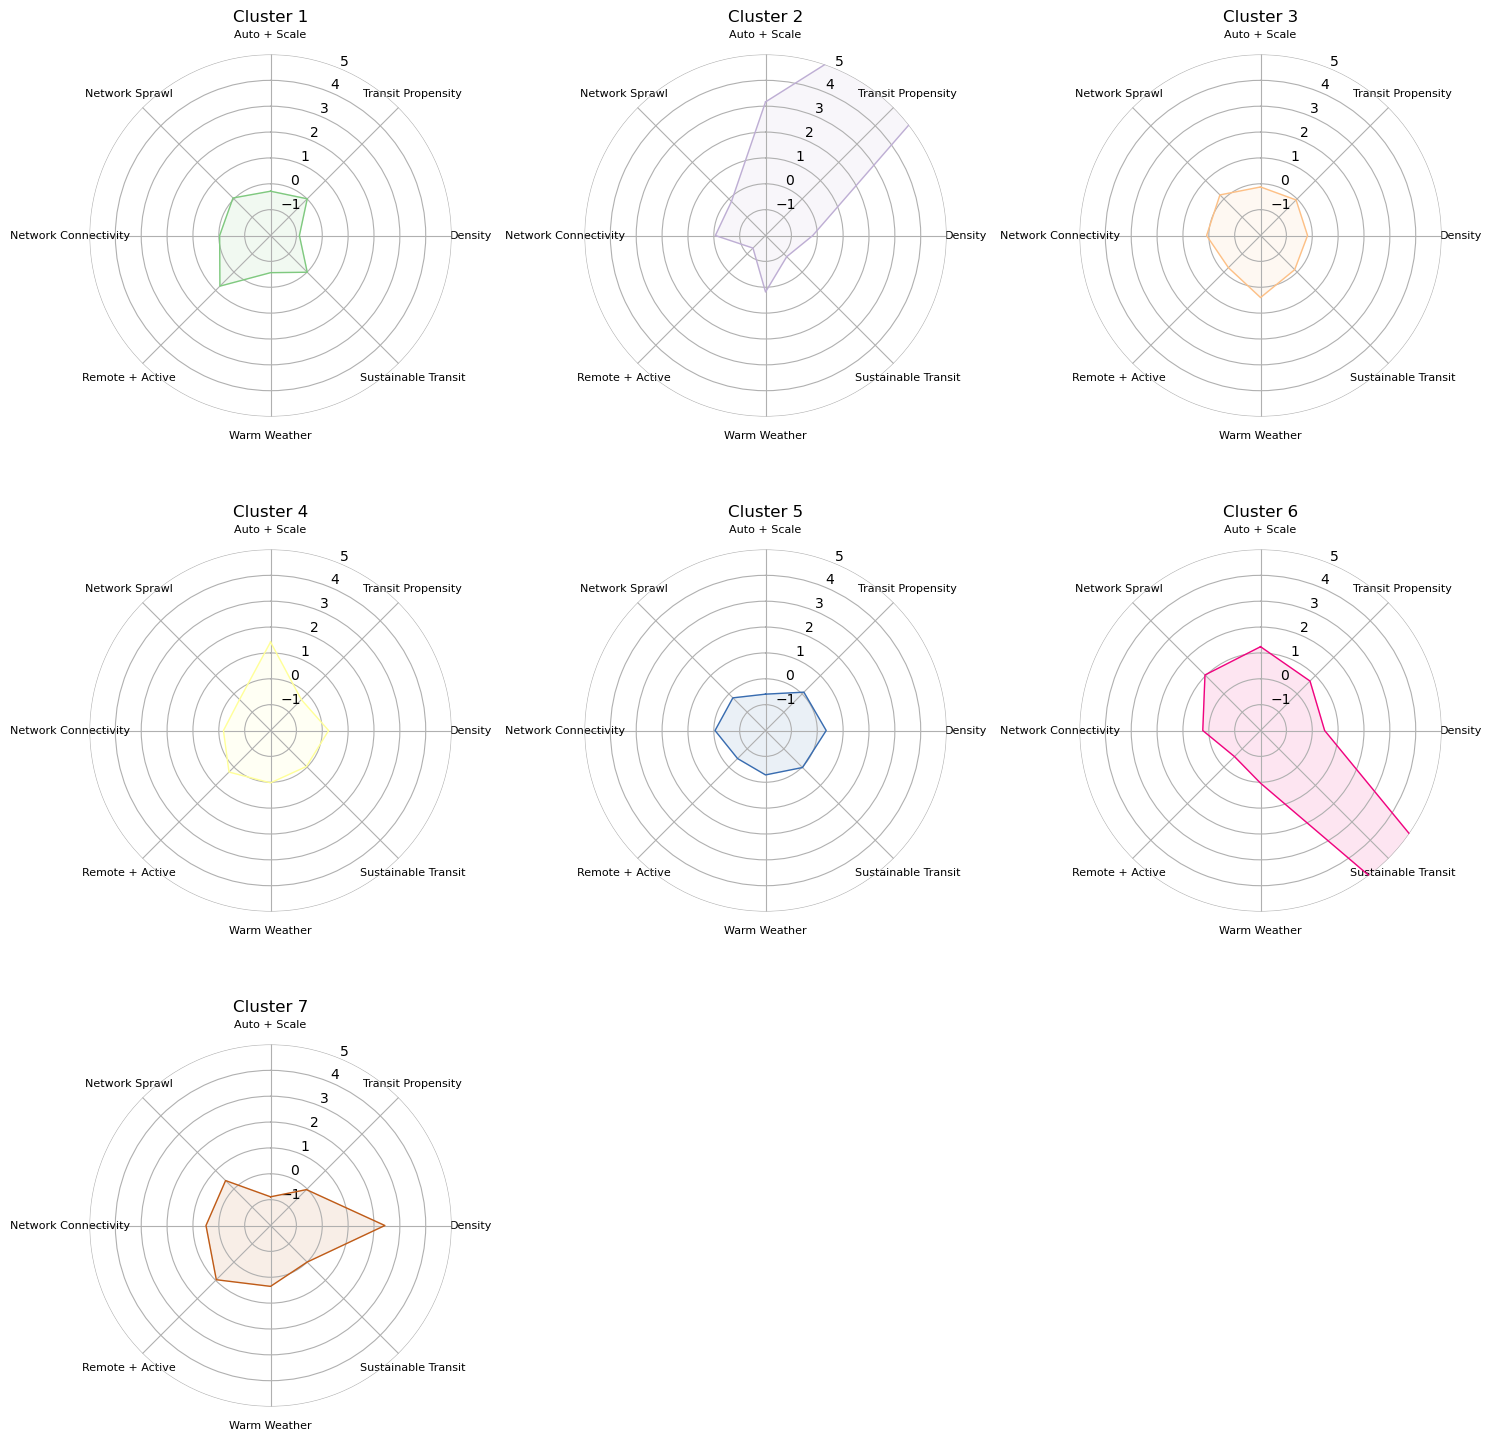

In [26]:


# Function to create radar charts
def create_radar_chart(df, cluster_label, ax, color):
    categories = list(df.columns)
    N = len(categories)
    
    # Get the values for the specific cluster
    values = df.loc[cluster_label].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster_label}', color=color)
    ax.fill(angles, values, alpha=0.1, color=color)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=8, color='black')
    ax.spines['polar'].set_visible(False)
    ax.grid(True)
    ax.set_ylim(-2, 5)

    ax.set_title(f'Cluster {cluster_label}', fontsize=12)
    #ax.legend(loc='upper right')

# Number of clusters
num_clusters = len(cluster_means.index)

# Create figure and axes
cols = 3
rows = (num_clusters // cols) + (1 if num_clusters % cols != 0 else 0)
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows), subplot_kw=dict(polar=True))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Define colors for each cluster
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f','#bf5b17']

colors = custom_palette[:num_clusters]

# Create radar charts for each cluster
for i, cluster_label in enumerate(cluster_means.index):
    ax = axs[i]
    color = colors[i % len(colors)]  # Use index to access the colors list
    create_radar_chart(cluster_means, cluster_label, ax, color)
# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

#min-max scaling 

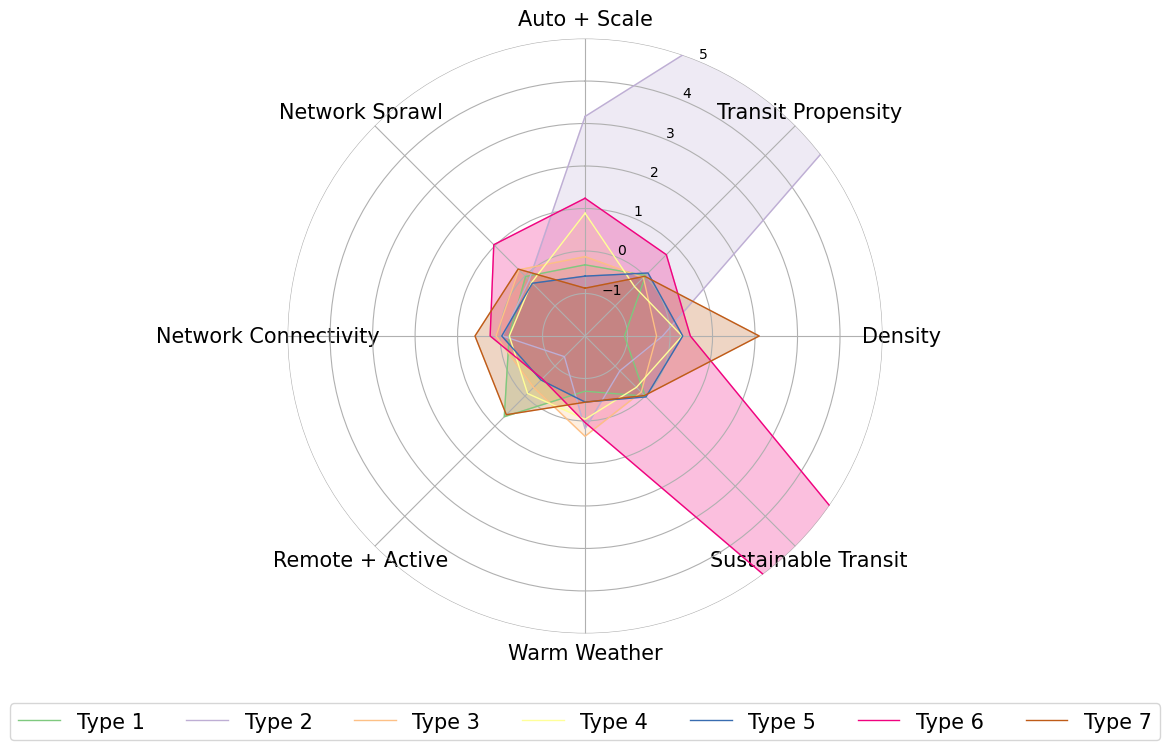

In [27]:
# Define your custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f','#bf5b17']

# Function to create radar charts
def create_radar_chart(ax, df, cluster_label, color):
    categories = list(df.columns)
    N = len(categories)
    
    # Get the values for the specific cluster
    values = df.loc[cluster_label].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Type {cluster_label}', color=color)
    ax.fill(angles, values, alpha=0.25, color=color)  # Adjust alpha for better visibility
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=15, color='black')
    ax.spines['polar'].set_visible(False)
    ax.grid(True)
    ax.set_ylim(-2, 5)


# Number of clusters
num_clusters = len(cluster_medians.index)

# Create figure and a single set of polar axes
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Define colors for each cluster using the custom palette
colors = custom_palette[:num_clusters]  # Use only as many colors as clusters

# Create radar charts for each cluster on the same axes
for i, cluster_label in enumerate(cluster_medians.index):
    color = colors[i % len(colors)]  # Use index to access the colors list
    create_radar_chart(ax, cluster_medians, cluster_label, color)

# Add legend and adjust layout
# Create a legend below the plot
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_clusters, fontsize=15)
plt.tight_layout()
plt.savefig('../../figures/spider-plot.jpg', dpi=600)


#mean max scaling; rescale the factor scores (min-max) and substract the maximum and minumum and divide everything by that value; rescale the factor to 0 to 1; 

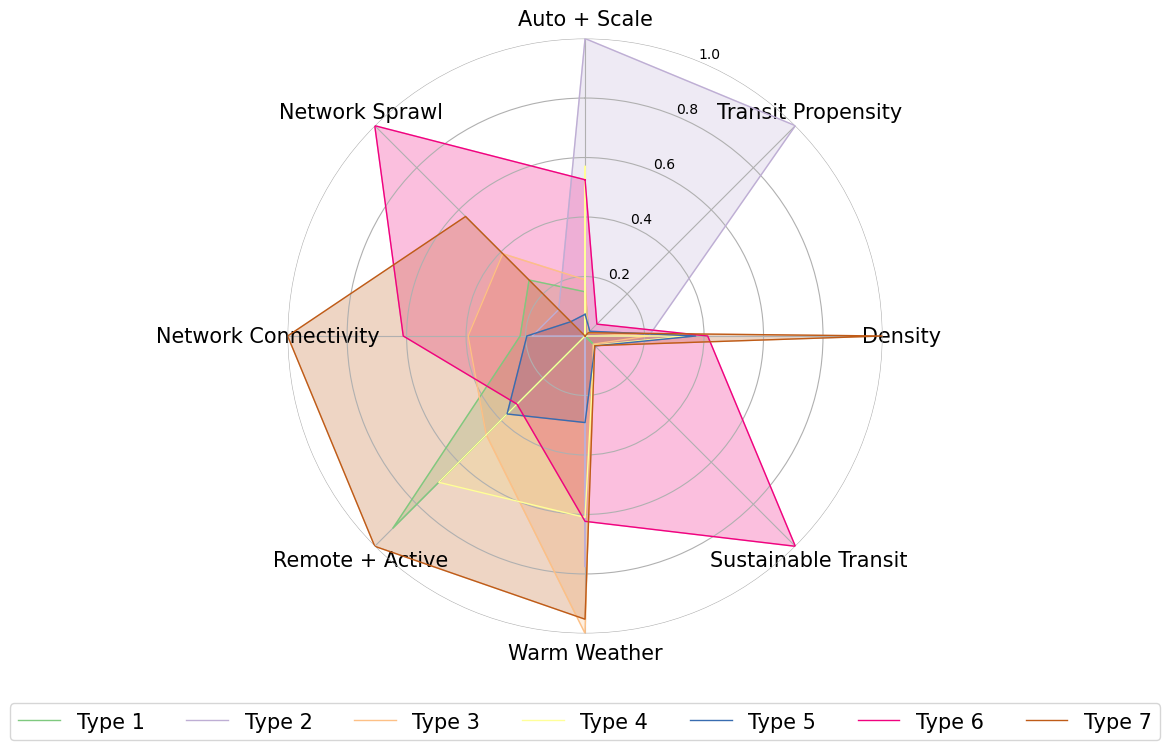

In [28]:

# Custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f','#bf5b17']

# Assuming 'cluster_medians' is the DataFrame containing median values for each cluster
# Perform min-max scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    index=cluster_means.index,
    columns=cluster_means.columns
)

# Function to create radar charts
def create_radar_chart(ax, df, cluster_label, color):
    categories = list(df.columns)
    N = len(categories)
    
    # Get the values for the specific cluster
    values = df.loc[cluster_label].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Type {cluster_label}', color=color)
    ax.fill(angles, values, alpha=0.25, color=color)  # Adjust alpha for better visibility
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=15, color='black')
    ax.spines['polar'].set_visible(False)
    ax.grid(True)
    ax.set_ylim(0, 1)  # Adjust the y-axis limits to match min-max scaling

# Number of clusters
num_clusters = len(scaled_data.index)

# Create figure and a single set of polar axes
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Define colors for each cluster using the custom palette
colors = custom_palette[:num_clusters]  # Use only as many colors as clusters

# Create radar charts for each cluster on the same axes
for i, cluster_label in enumerate(scaled_data.index):
    color = colors[i % len(colors)]  # Use index to access the colors list
    create_radar_chart(ax, scaled_data, cluster_label, color)

# Add legend and adjust layout
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_clusters, fontsize=15)
plt.tight_layout()

# Save the radar plot as an image
plt.savefig('../../figures/spider-plot.jpg', dpi=600)


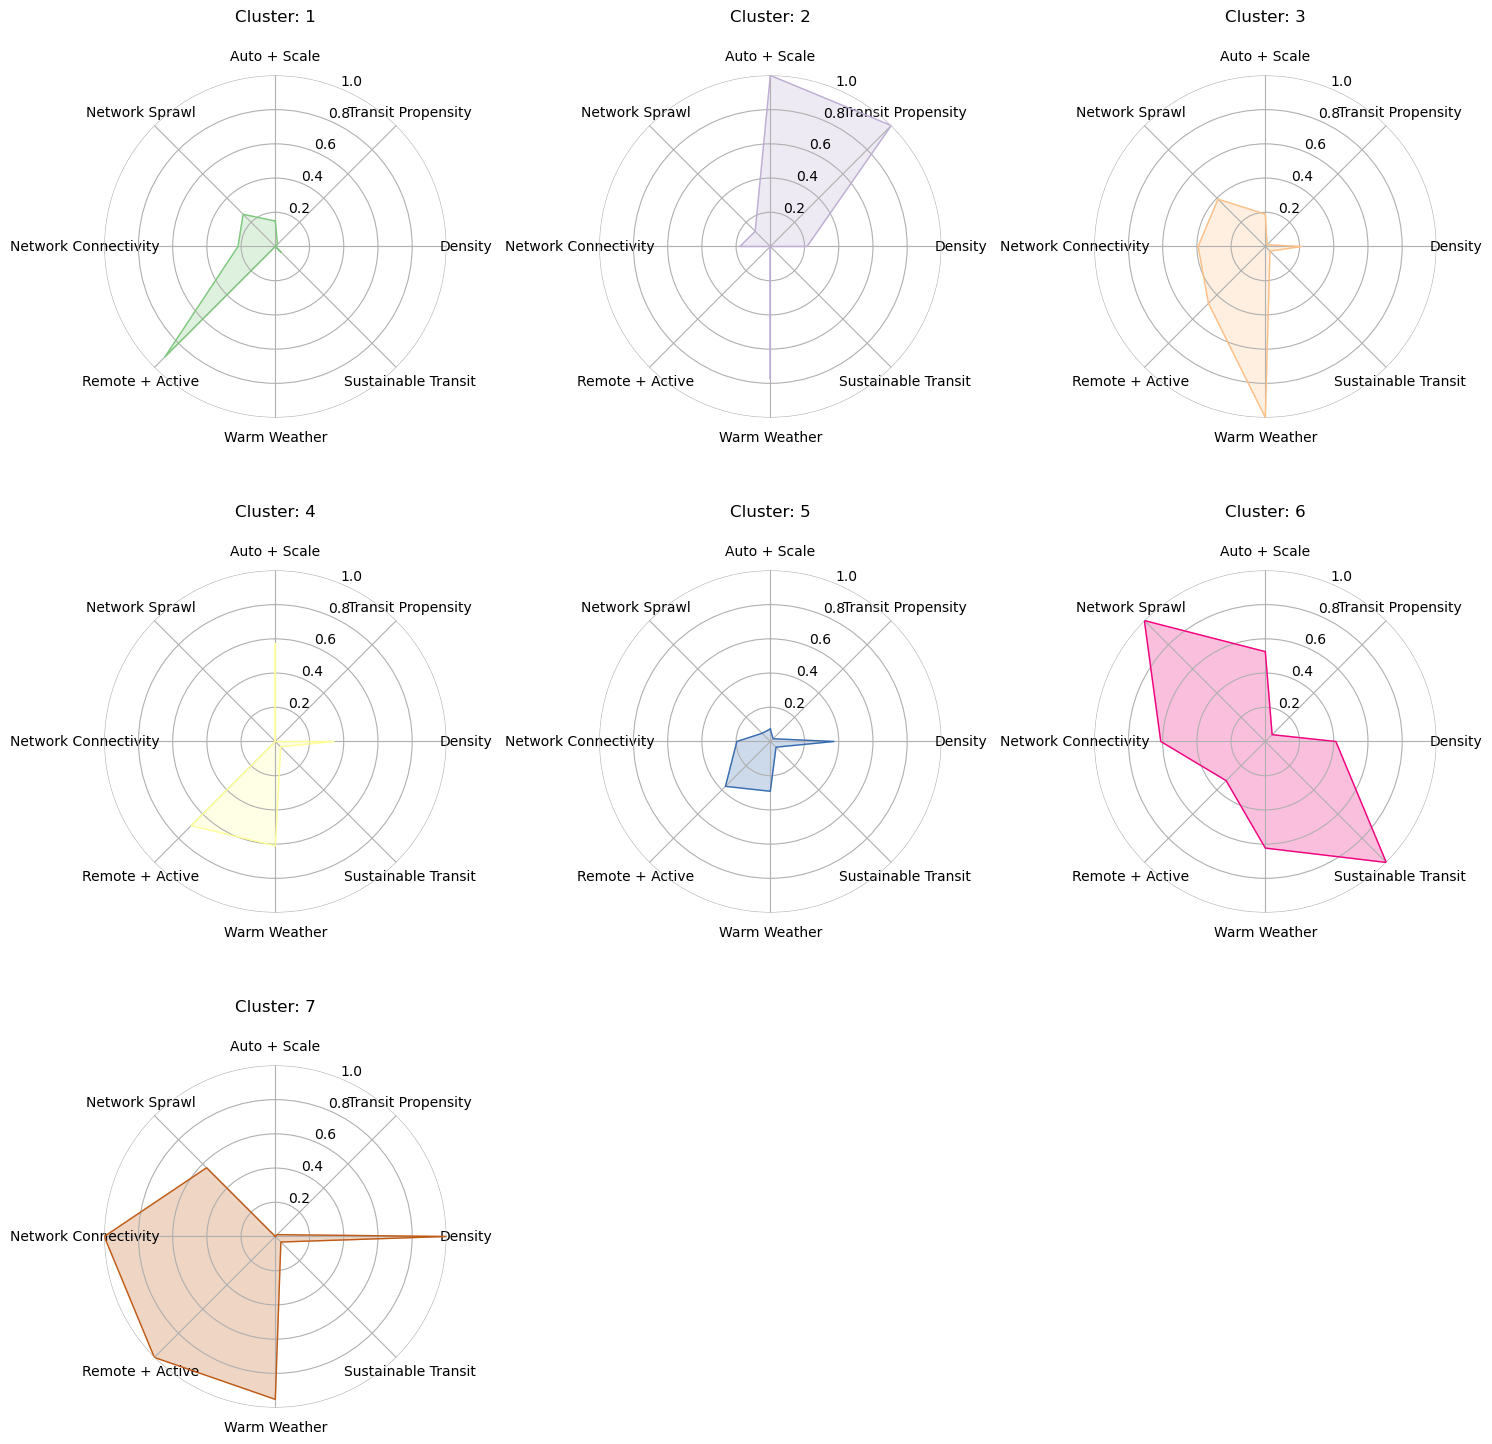

In [29]:


# Custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

# Assuming 'cluster_means' is the DataFrame containing median values for each cluster
# Perform min-max scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    index=cluster_means.index,
    columns=cluster_means.columns
)

# Function to create radar charts
def create_radar_chart(ax, df, cluster_label, color):
    categories = list(df.columns)
    N = len(categories)
    
    # Get the values for the specific cluster
    values = df.loc[cluster_label].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Type {cluster_label}', color=color)
    ax.fill(angles, values, alpha=0.25, color=color)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10, color='black')
    ax.spines['polar'].set_visible(False)
    ax.grid(True)
    ax.set_ylim(0, 1)  # Adjust the y-axis limits to match min-max scaling
    ax.set_title(f"Cluster: {cluster_label}", fontsize=12, pad=20)

# Number of clusters
num_clusters = len(scaled_data.index)

# Create subplots (determine grid size based on the number of clusters)
cols = 3  # Number of columns
rows = (num_clusters + cols - 1) // cols  # Calculate rows based on the number of clusters

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), subplot_kw=dict(polar=True))

# Flatten axes for easier iteration
axes = axes.flatten()

# Create radar charts for each cluster
for i, cluster_label in enumerate(scaled_data.index):
    color = custom_palette[i % len(custom_palette)]  # Cycle through the custom palette
    create_radar_chart(axes[i], scaled_data, cluster_label, color)

# Turn off unused subplots (if any)
for j in range(num_clusters, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('../../figures/separate_spider_plots.jpg', dpi=600)
plt.show()


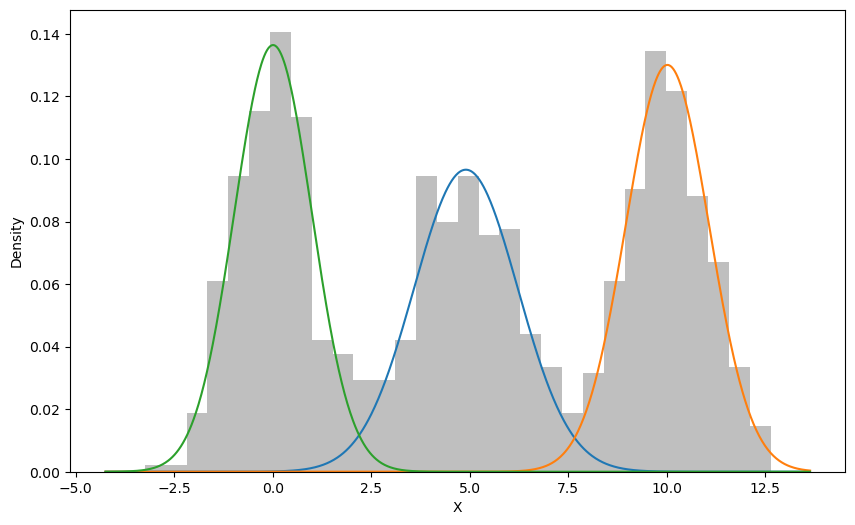

In [30]:


# Generate synthetic data
np.random.seed(42)
X1 = np.random.normal(0, 1, size=(300, 1))
X2 = np.random.normal(5, 1.5, size=(300, 1))
X3 = np.random.normal(10, 1, size=(300, 1))
X = np.vstack((X1, X2, X3))

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Generate a range of values for plotting the Gaussian curves
x = np.linspace(np.min(X) - 1, np.max(X) + 1, 1000)

# Compute the Gaussian Mixture Model's PDF for each point in `x`
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))

# Plot the Gaussian curves for each component
plt.figure(figsize=(10, 6))

for i in range(gmm.n_components):
    mean = gmm.means_[i, 0]
    std = np.sqrt(gmm.covariances_[i, 0, 0])
    weight = gmm.weights_[i]
    y = weight * (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    plt.plot(x, y, label=f'Component {i + 1}')


    
# Plot data points as a histogram
plt.hist(X, bins=30, density=True, alpha=0.5, color='gray', label='Data Histogram')


plt.xlabel('X')
plt.ylabel('Density')
plt.savefig('../../figures/GMM-3D-shape.jpg', dpi=600)
plt.show()
